In [1]:
import numpy as np
import pandas as pd
import pyabf
import matplotlib.pyplot as plt
from scipy import signal
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from scipy.signal import argrelextrema
import scipy
from sklearn.mixture import GaussianMixture

%matplotlib notebook

In [2]:
abf = pyabf.ABF("EPSC_trains/WT_2021_07_09_0009.abf") # multiple frequencies
# abf = pyabf.ABF("WT_Data/Deplete/15115017.abf") 
# abf = pyabf.ABF("WT_Data/Deplete/15325023.abf")

In [28]:
dir(abf)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adcSection',
 '_cacheStimulusFiles',
 '_dacSection',
 '_dataGain',
 '_dataOffset',
 '_dataSection',
 '_dtype',
 '_epochPerDacSection',
 '_epochSection',
 '_fileGUID',
 '_fileSize',
 '_getAdcNameAndUnits',
 '_getDacNameAndUnits',
 '_headerV2',
 '_ide_helper',
 '_loadAndScaleData',
 '_makeAdditionalVariables',
 '_md5',
 '_nDataFormat',
 '_preLoadData',
 '_protocolSection',
 '_readHeadersV1',
 '_readHeadersV2',
 '_stringsSection',
 '_sweepBaselinePoints',
 '_synchArraySection',
 '_tagSection',
 '_userListSection',
 'abfDateTime',
 'abfDateTimeString',
 'abfFileComment',
 'abfFilePath',
 'abfFolderPath',
 '

In [51]:
abf.sweepUnitsY

'nA'

In [23]:
abf.headerMarkdown

'# WT_2021_07_09_0009.abf\n\n## ABF Class Methods\n\n* abf.getAllXs()\n* abf.getAllYs()\n* abf.launchInClampFit()\n* abf.saveABF1()\n* abf.setSweep()\n* abf.sweepD()\n\n## ABF Class Variables\n\n* abfDateTime = `2021-07-09 18:10:22.292000`\n* abfDateTimeString = `2021-07-09T18:10:22.292`\n* abfFileComment = ``\n* abfFilePath = `/Users/tingtingwang/Work/hfrp/EPSC_trains/WT_2021_07_09_0009.abf`\n* abfFolderPath = `/Users/tingtingwang/Work/hfrp/EPSC_trains`\n* abfID = `WT_2021_07_09_0009`\n* abfVersion = `{\'major\': 2, \'minor\': 9, \'bugfix\': 0, \'build\': 0}`\n* abfVersionString = `2.9.0.0`\n* adcNames = `[\'Vm1\', \'Im_2\']`\n* adcUnits = `[\'mV\', \'nA\']`\n* channelCount = `2`\n* channelList = `[0, 1]`\n* creator = `Clampex 11.1.0.23`\n* creatorVersion = `{\'major\': 11, \'minor\': 1, \'bugfix\': 0, \'build\': 23}`\n* creatorVersionString = `11.1.0.23`\n* dacNames = `[\'Cmd 0\', \'Cmd 1\']`\n* dacUnits = `[\'mV\', \'nA\']`\n* data = `array (2d) with values like: -65.36865, -65.2679

In [24]:
print(abf.headerText)


ABF Class Methods
abf.getAllXs()
abf.getAllYs()
abf.launchInClampFit()
abf.saveABF1()
abf.setSweep()
abf.sweepD()

ABF Class Variables
abfDateTime = 2021-07-09 18:10:22.292000
abfDateTimeString = 2021-07-09T18:10:22.292
abfFileComment =
abfFilePath = /Users/tingtingwang/Work/hfrp/EPSC_trains/WT_2021_07_09_0009.abf
abfFolderPath = /Users/tingtingwang/Work/hfrp/EPSC_trains
abfID = WT_2021_07_09_0009
abfVersion = {'major': 2, 'minor': 9, 'bugfix': 0, 'build': 0}
abfVersionString = 2.9.0.0
adcNames = ['Vm1', 'Im_2']
adcUnits = ['mV', 'nA']
channelCount = 2
channelList = [0, 1]
creator = Clampex 11.1.0.23
creatorVersion = {'major': 11, 'minor': 1, 'bugfix': 0, 'build': 23}
creatorVersionString = 11.1.0.23
dacNames = ['Cmd 0', 'Cmd 1']
dacUnits = ['mV', 'nA']
data = [[ -65.3687  -65.2679  -65.2496 ...  -65.3137  -65.3687  -65.3412]
[   1.2817   -6.5308   -7.0801 ... -653.2592 -653.4118 -653.4118]]
dataByteStart = 19456
dataLengthMin = 0.2
dataLengthSec = 12.0
dataPointByteSize = 2
dataPoint

In [38]:
1/np.array(abf._adcSection.fInstrumentScaleFactor)

array([ 100., 1000.])

In [1530]:
# abf.headerText

In [1531]:
abf.abfFileComment

''

In [1490]:
print(abf)

ABF (version 1.8.3.0) with 2 channels (mV, nA), sampled at 11.111 kHz, containing 6 sweeps, having no tags, with a total length of 0.26 minutes, recorded with protocol "2EVC_Train".


In [4]:
abf.sweepCount

7

In [5]:
abf.setSweep(2,1)

In [6]:
T = abf.sweepX[1]-abf.sweepX[0]
N = len(abf.sweepX)
F = 1/(N*T)
fs = 1/T

samp_freq = fs  # Sample frequency (Hz)

In [7]:
w_s=300
w_t=800
# w is number points to find intercept
# th is the max peak of spikes
mbase = np.mean(abf.sweepY[w_s:w_t])
abf.sweepY = abf.sweepY-mbase

In [8]:
lowpass_f=400#220
b,a = signal.butter(3, lowpass_f, btype='lowpass', fs=samp_freq, output='ba') 
y_notched = signal.filtfilt(b, a, abf.sweepY)

In [9]:
y_notched = scipy.signal.savgol_filter(abf.sweepY, 21, 5)

<IPython.core.display.Javascript object>


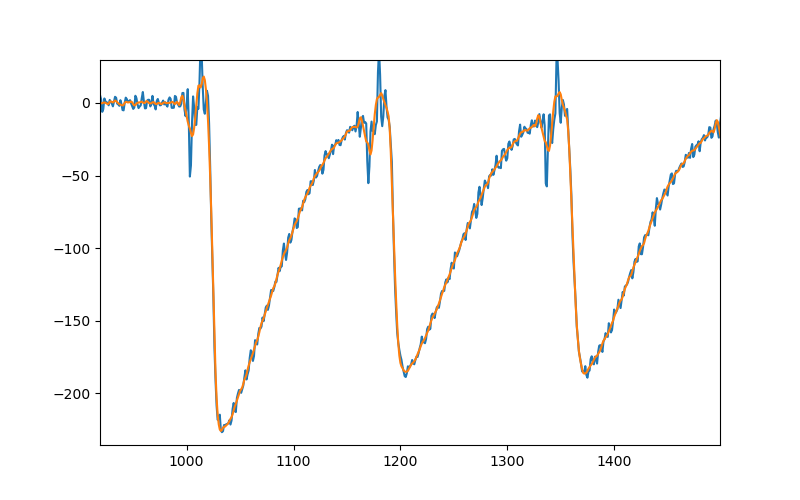

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(abf.sweepY)
plt.plot(y_notched)

<IPython.core.display.Javascript object>


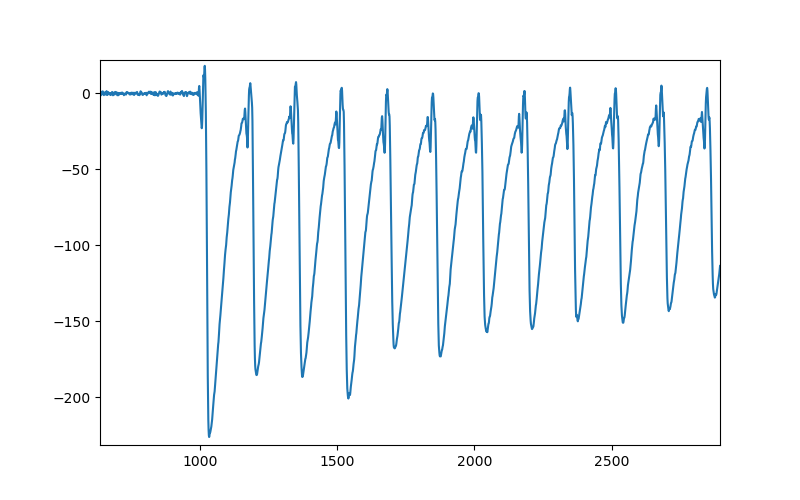

In [40]:
plt.figure(figsize=(8, 5))
plt.plot(y_notched)

<IPython.core.display.Javascript object>


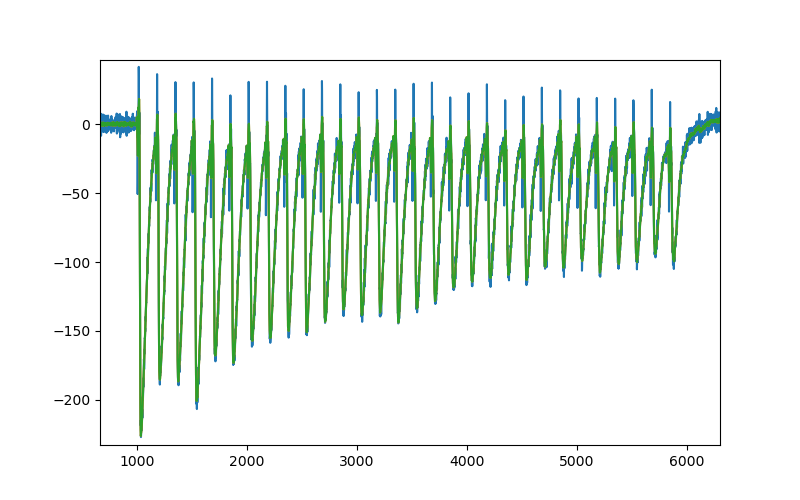

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(abf.sweepY)
plt.plot(y_notched)

<IPython.core.display.Javascript object>


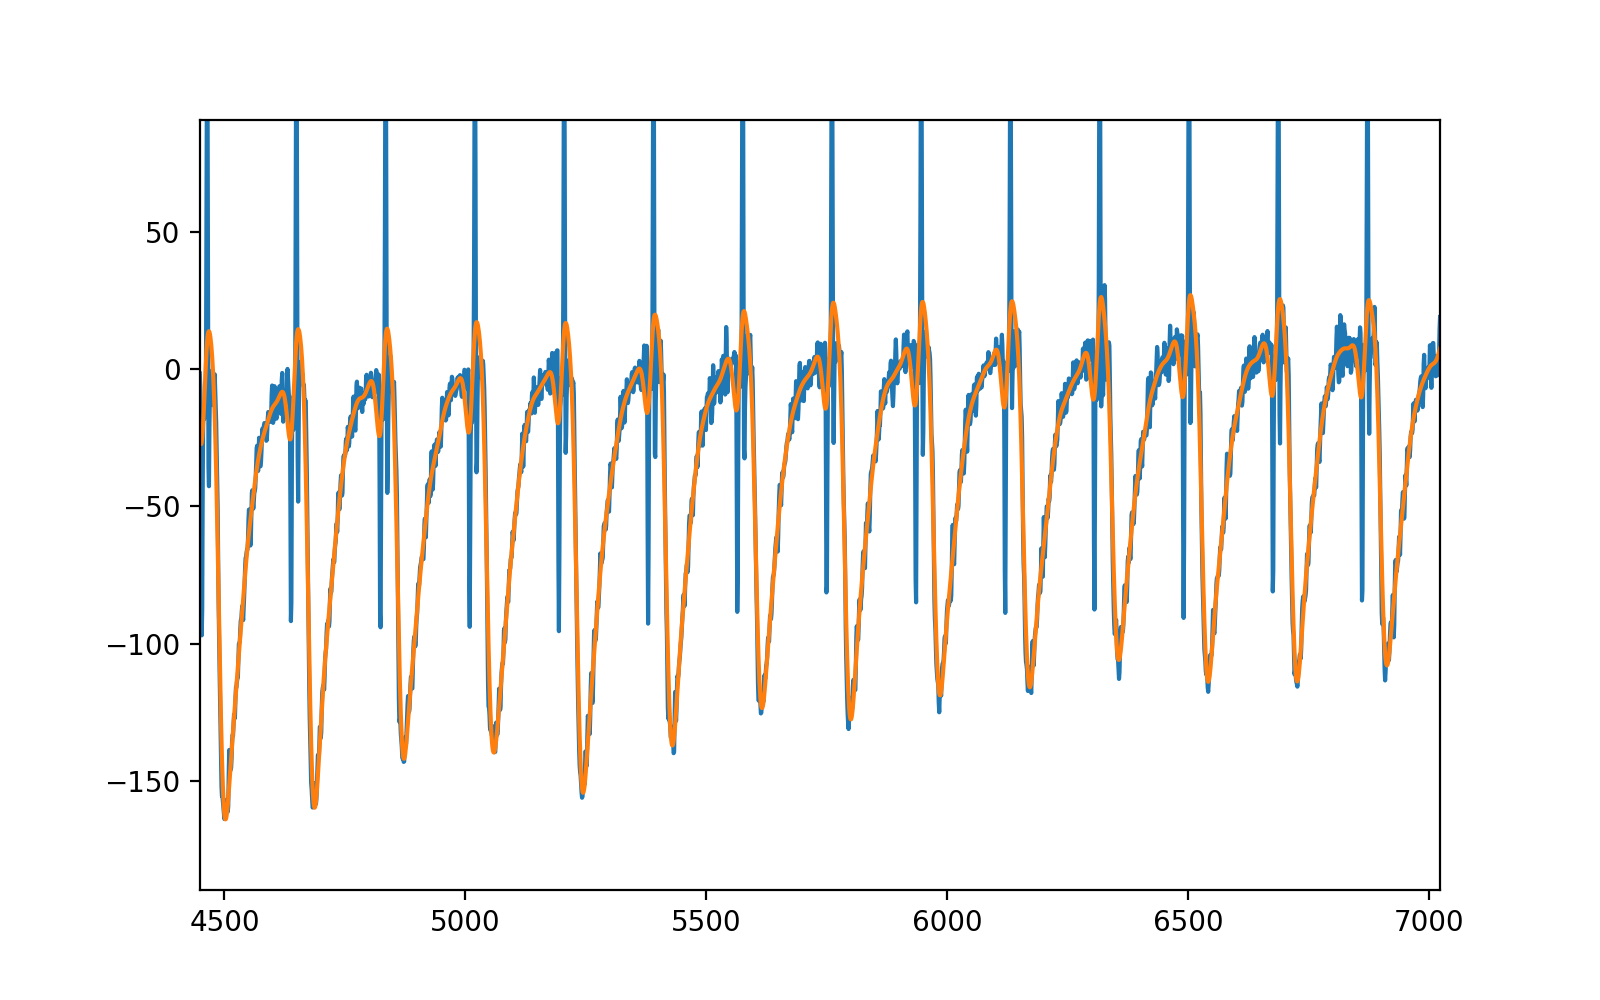

In [1570]:
plt.figure(figsize=(8, 5))
plt.plot(abf.sweepY)
plt.plot(y_notched)

In [1571]:
order = 80
idxs = argrelextrema(y_notched+ np.random.random(len(y_notched))* 1e-10, np.less,order=order)[0]

<IPython.core.display.Javascript object>


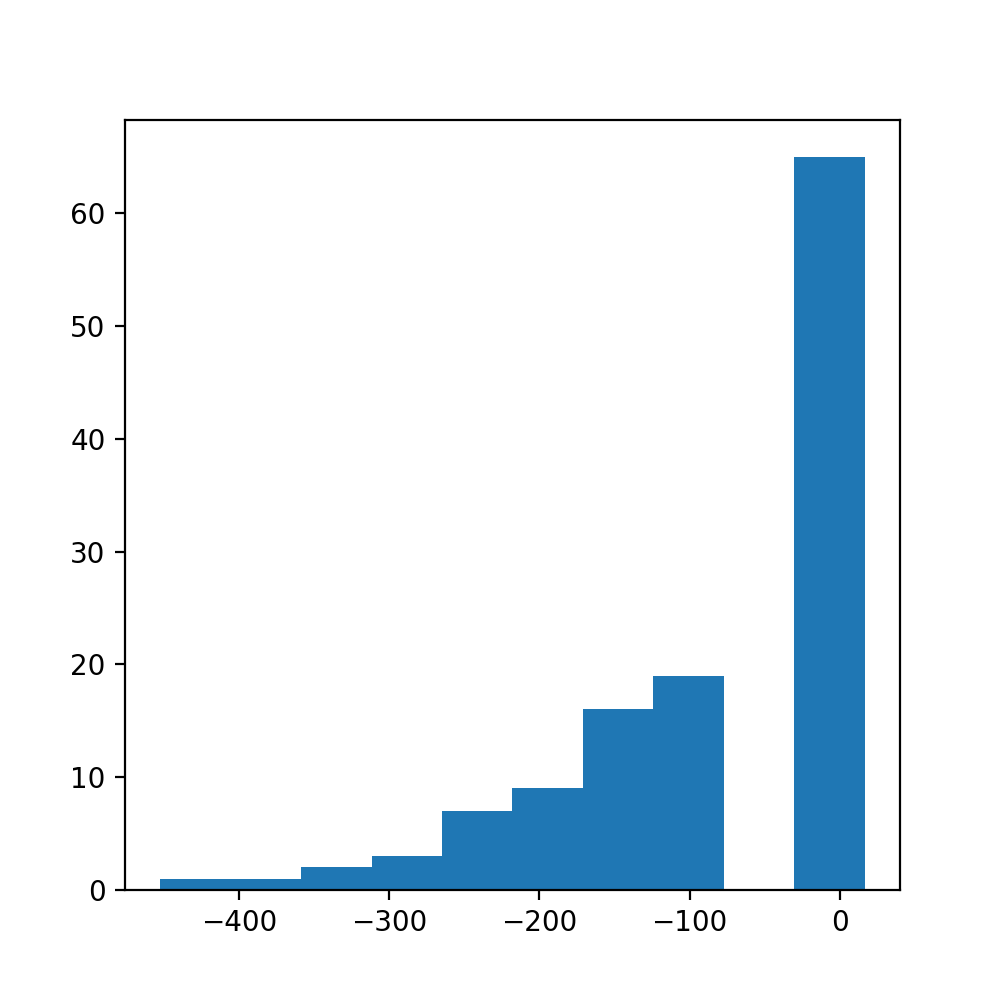

(array([ 1.,  1.,  2., ..., 19.,  0., 65.]),
 array([-452.6304, -405.6923, -358.7541, ...,  -77.1253,  -30.1872,
          16.751 ], dtype=float32),
 <BarContainer object of 10 artists>)

In [1316]:
plt.figure(figsize=(5, 5))
plt.hist(y_notched[idxs])

In [1572]:
pks = y_notched[idxs]
len(pks[pks<-80])

40

In [1573]:
up = pks[pks<-80][0]*1.01
ids1 = idxs[(pks<-80)&(pks>up)]
# ids1 = idxs[(pks<-100)]

In [1540]:
len(ids1)

26

In [1574]:
dd = np.diff(ids1)
m = np.median(dd)
v = max(np.median(np.abs(dd-m))*1.4826,0.5)
up = m+15*v
dn = m-15*v

In [1575]:
up=m*2

sel=[0,1]
p=1
for i in range(2,len(ids1)):
    d = ids1[i]-ids1[p]
    if d<up:
        sel.append(i)
        p=i
    else:
        break

In [1276]:
ii = np.where((dd>dn)&(dd<up))[0]
sel =[]
for j in range(len(ii)-1):
    if ii[j+1]-ii[j]>1:
#         sel.append(ii[j]+1)
        break
    sel.append(ii[j+1])
    sel.append(ii[j])
sel = list(set(ii)|set(ii+1))
# sel = np.array(sel)
# sel = list(set(sel)|set(sel+1))

In [1523]:
sel=[0,1]
p=1
for i in range(2,len(ids1)):
    d = ids1[i]-ids1[p]
    if d>dn and d<up:
        sel.append(i)
        p=i

In [1240]:
dn,up

(163.761, 208.239)

In [1213]:
1/(190*T)

58.47894736842106

<IPython.core.display.Javascript object>


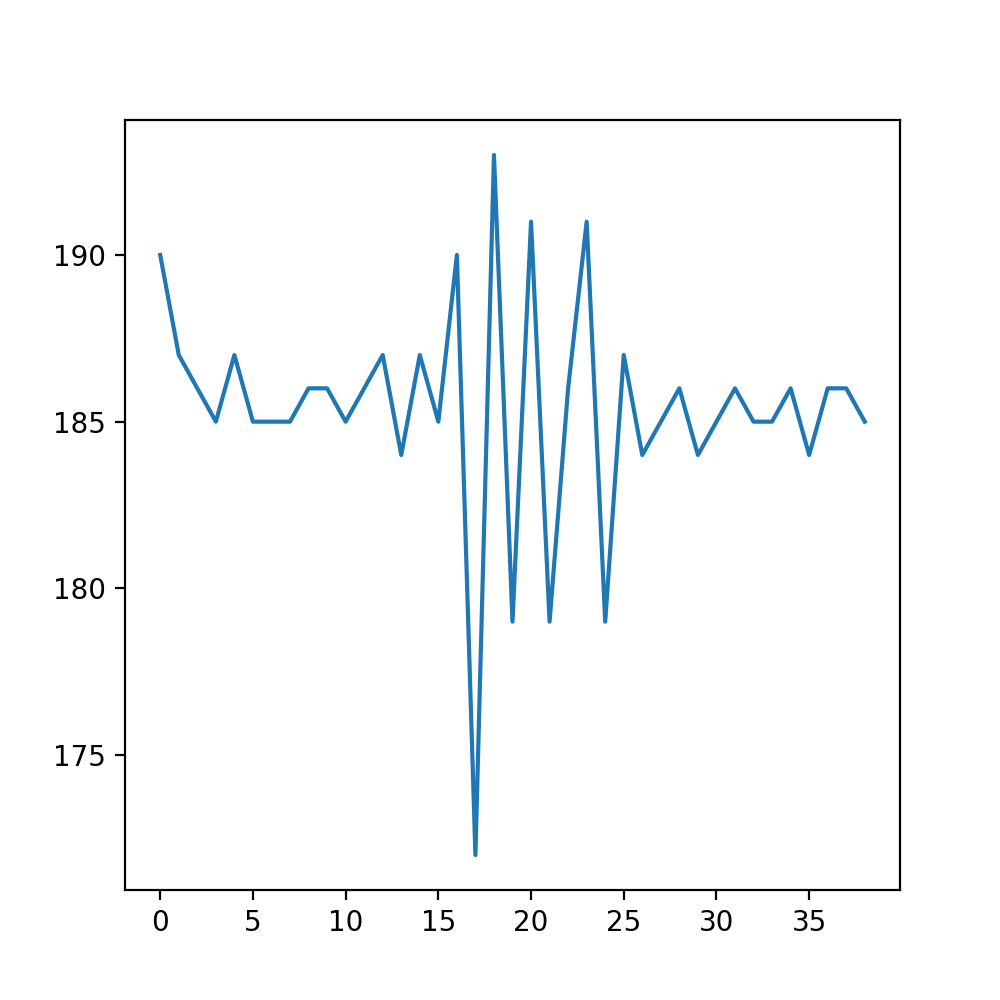

In [1211]:
plt.figure(figsize=(5, 5))
plt.plot(dd)

In [1075]:
ids1[25]-ids1[24]

186

In [1062]:
ids1[ids1>5250]

array([ 5378,  5424,  5610, ..., 14994, 16105, 16474])

In [1076]:
np.where(ids1>5250)[0]

array([23, 24, 25, ..., 62, 63, 64])

In [1077]:
ids1[23:25]

array([5378, 5424])

In [1256]:
dn,up

(99.04400000000001, 276.956)

In [1080]:
dn,up,v

(29.326999999999998, 340.673, 10.3782)

<IPython.core.display.Javascript object>


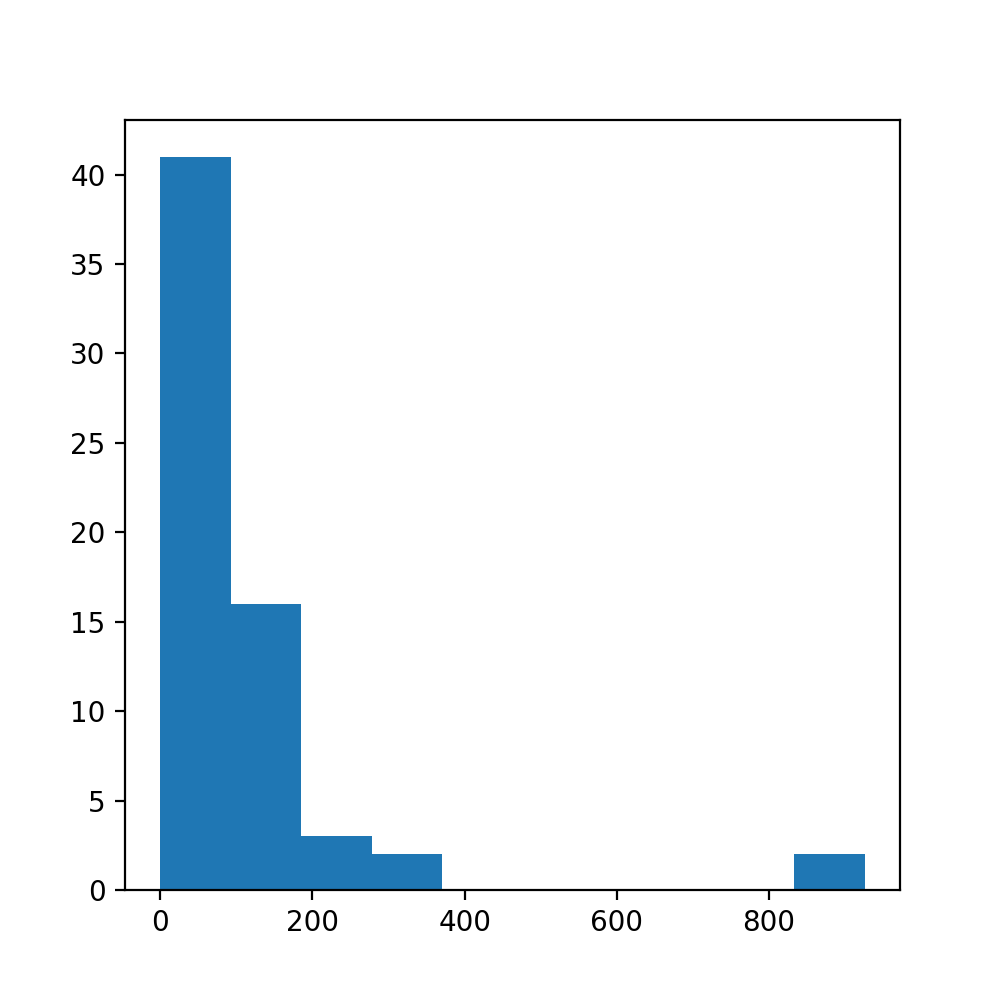

(array([41., 16.,  3., ...,  0.,  0.,  2.]),
 array([  0. ,  92.6, 185.2, ..., 740.8, 833.4, 926. ]),
 <BarContainer object of 10 artists>)

In [1082]:
plt.figure(figsize=(5, 5))
plt.hist(np.abs(dd-m))

In [1277]:
sel=np.array(range(sel[-1]+1))

In [1576]:
ids1 = ids1[sel]

In [1577]:
order = 3
idxm = argrelextrema(abf.sweepY, np.greater,order=order)[0]

idxmf = argrelextrema(y_notched, np.greater,order=10)[0]

In [1578]:
res=[]
for i in range(len(ids1)):
    j=ids1[i]
#     s=idxm[np.where(idxm<j)[0][-1]]
    s=idxm[np.where((idxm<j)&((j-idxm)>10))[0][-1]]
    t=idxmf[np.where(idxmf>j)[0][0]]
    res.append([s,t,j])
res=np.array(res)

<IPython.core.display.Javascript object>


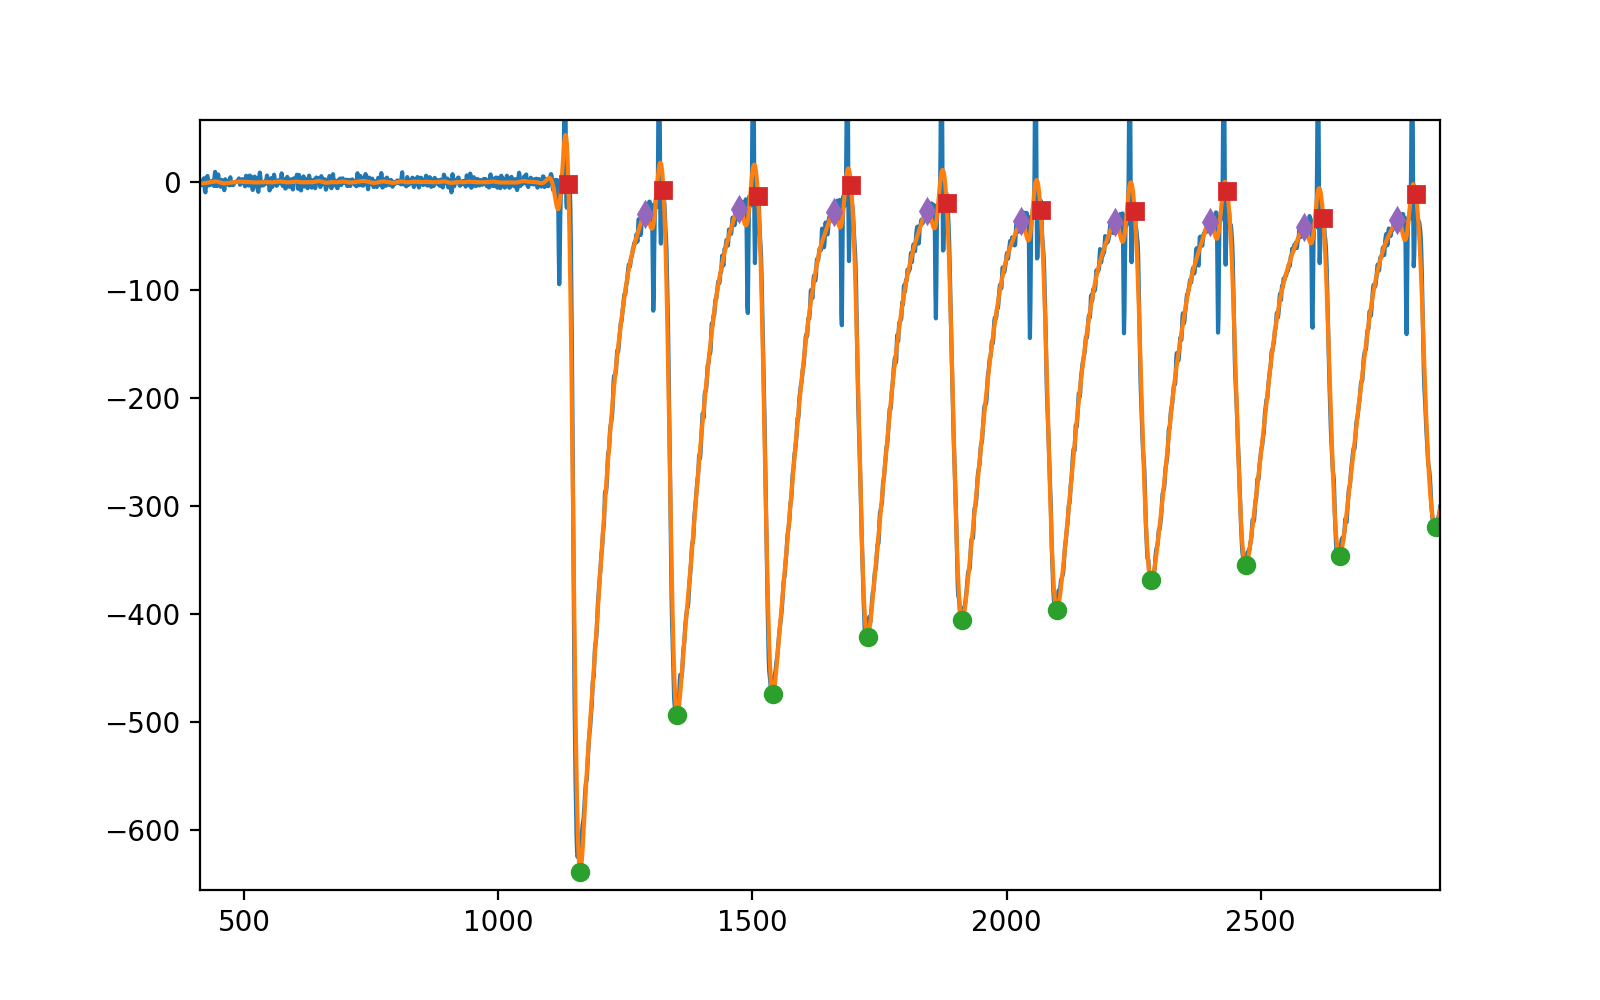

In [1579]:
plt.figure(figsize=(8, 5))
plt.plot(abf.sweepY)
plt.plot(y_notched)
plt.plot(ids1,y_notched[ids1],'o')
plt.plot(res[:,0],y_notched[res[:,0]],'s')
plt.plot(res[:,1],y_notched[res[:,1]],'d')

In [1580]:
fun = lambda w: w[0]*(np.exp(-w[1]*t)-np.exp(-w[2]*t))

fun1 = lambda w: np.linalg.norm(xs-fun(w))

In [1090]:
i=0
xs = abf.sweepY[res[i,0]:res[i,1]]
t = np.linspace(0,1,len(xs))

In [184]:
w0=[-np.min(xs)*0.8,10,3]

In [185]:
from scipy.optimize import basinhopping
minimizer_kwargs = {"method": "Nelder-Mead",'tol':1e-6}
res = basinhopping(fun1, w0, minimizer_kwargs=minimizer_kwargs, niter=20)

In [186]:
res.x

array([1240.0551,   13.1962,    2.695 ])

In [187]:
res

                        fun: 510.16170371884203
 lowest_optimization_result:  final_simplex: (array([[1240.0551,   13.1962,    2.695 ],
       [1240.0551,   13.1962,    2.695 ],
       [1240.0551,   13.1962,    2.695 ],
       [1240.0551,   13.1962,    2.695 ]]), array([510.1617, 510.1617, 510.1617, 510.1617]))
           fun: 510.16170371884203
       message: 'Optimization terminated successfully.'
          nfev: 227
           nit: 116
        status: 0
       success: True
             x: array([1240.0551,   13.1962,    2.695 ])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 4889
                        nit: 20
                          x: array([1240.0551,   13.1962,    2.695 ])

<IPython.core.display.Javascript object>


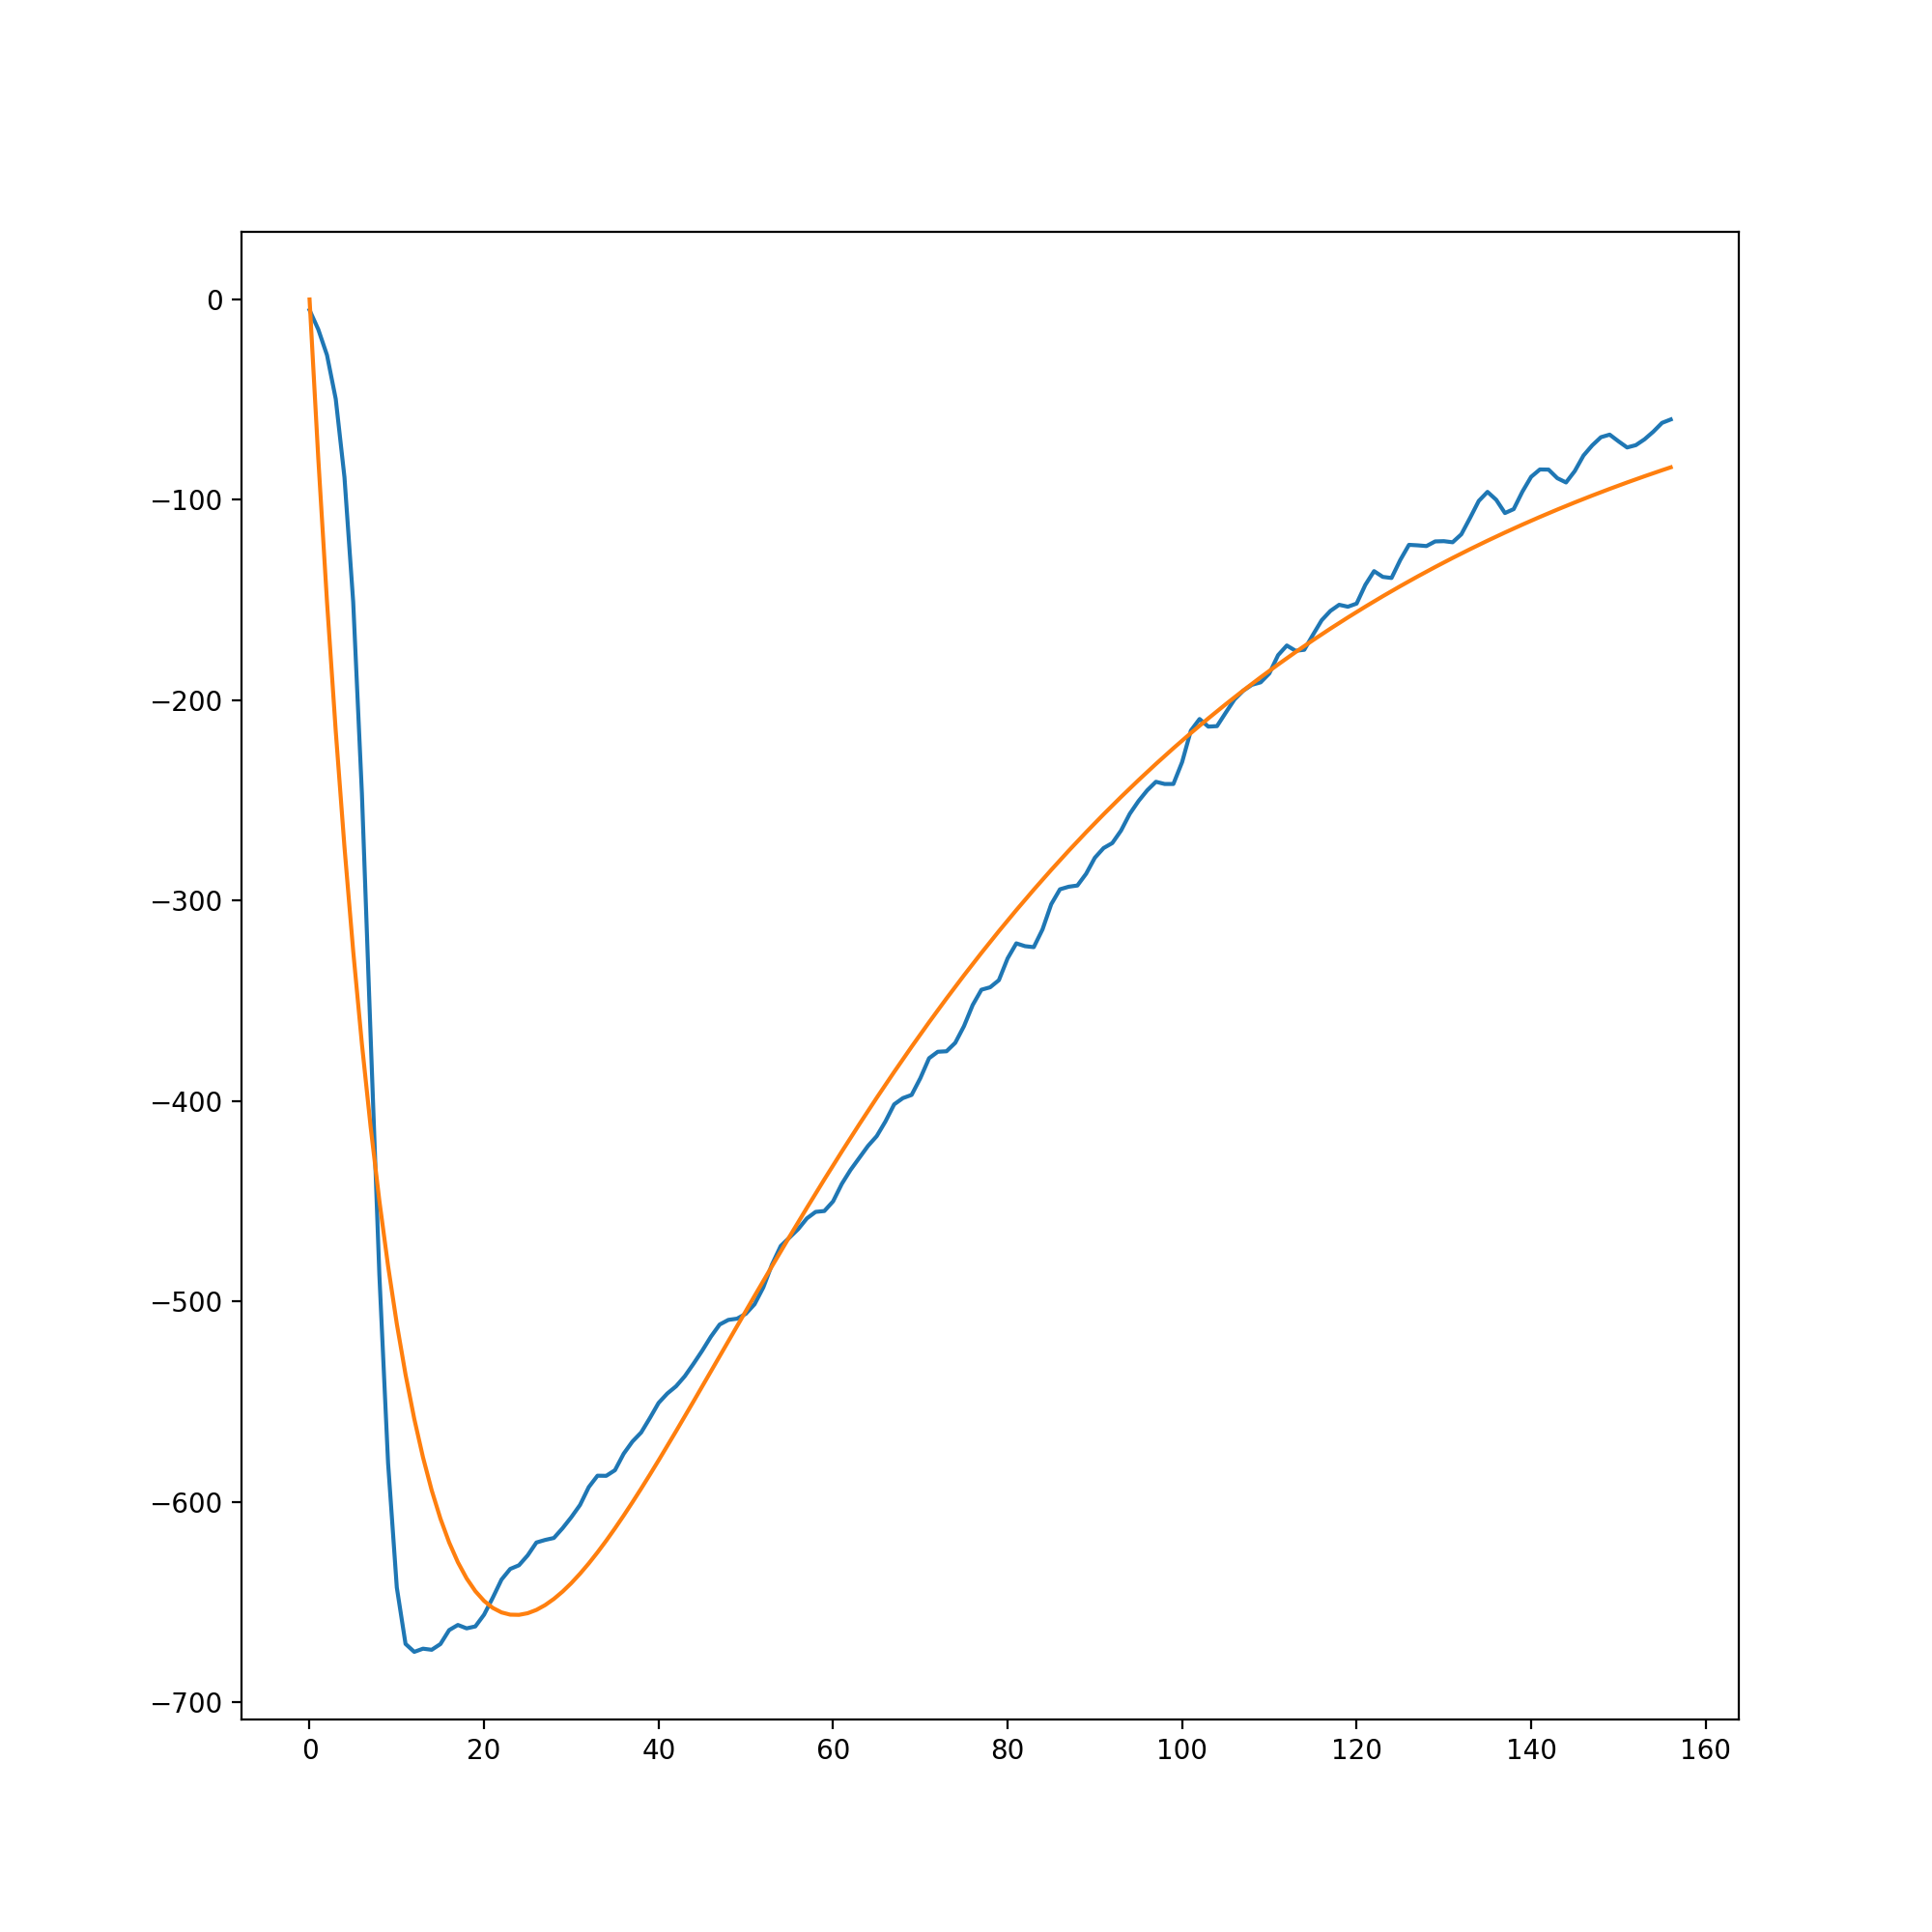

In [188]:
fig = plt.figure(figsize=(5,5))
plt.plot(xs)
plt.plot(fun(res.x))

In [218]:
# use only the second half

i=0
a=0.7
tt = abf.sweepY[res[i,2]:res[i,1]]
xs=tt[int(len(tt)*a):]
s = int(len(tt)*a) + res[i,2]
t = np.linspace(0,1,len(xs))

In [219]:
abf.sweepY[s],xs[0]

(-167.29736, -167.29736)

In [220]:
# fun = lambda w: w[0]+np.exp(-w[1]*t+w[2])
fun = lambda w: w[0]*np.exp(-w[1]*t)
fun1 = lambda w: np.linalg.norm(xs-fun(w))

In [221]:
# w0=[np.min(xs)*0.8,1,0]
w0=[np.min(xs)*0.8,1]
from scipy.optimize import basinhopping
minimizer_kwargs = {"method": "Nelder-Mead",'tol':1e-6}
r = basinhopping(fun1, w0, minimizer_kwargs=minimizer_kwargs, niter=20)

In [222]:
r.x

array([-166.1692,    0.9717])

<IPython.core.display.Javascript object>


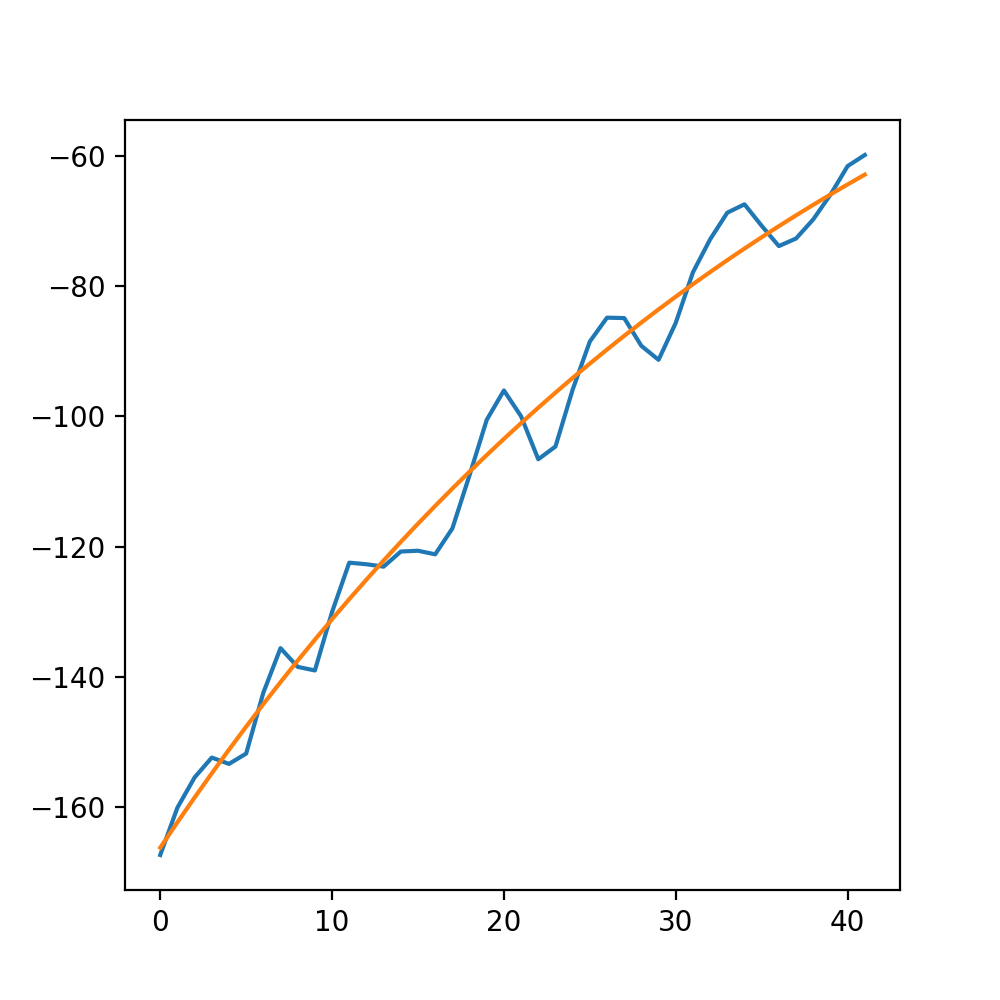

In [223]:
fig = plt.figure(figsize=(5,5))
plt.plot(xs)
plt.plot(fun(r.x))

In [1581]:
from scipy.optimize import basinhopping
minimizer_kwargs = {"method": "Nelder-Mead",'tol':1e-6}
base = np.zeros(len(res))

fun = lambda w: w[0]*np.exp(-w[1]*t)
fun1 = lambda w: np.linalg.norm(xs-fun(w))

for i in range(len(res)-1):
    if i<=1:
        a=0.6
    else:
        a=0.5
#     tt = abf.sweepY[res[i,2]:res[i,1]]
    tt = y_notched[res[i,2]:res[i,1]]
    
    xs=tt[int(len(tt)*a):]
    s = int(len(tt)*a) + res[i,2]
    t = np.linspace(0,1,len(xs))
    dt = t[1]-t[0]
    
    w0=[np.min(xs)*0.8,1]

    r = basinhopping(fun1, w0, minimizer_kwargs=minimizer_kwargs, niter=2)
    
    t = (res[i+1:,2]-s)*dt
    print(i)
    print(r.x)
    base[i+1:]=base[i+1:]+fun(r.x)

0
[-150.264     1.5955]
1
[-121.8868    1.536 ]
2
[-172.3102    1.7947]
3
[-150.691     1.6473]
4
[-150.9869    1.4534]
5
[-146.118     1.3962]
6
[-147.2742    1.3499]
7
[-136.0261    1.1925]
8
[-129.9389    1.3711]
9
[-132.7017    1.2763]
10
[-92.608    1.1286]
11
[-105.5271    1.4074]
12
[-78.2562   1.0954]
13
[-101.29      1.5016]
14
[-67.3545   1.2125]
15
[-64.7888   1.2963]
16
[-56.7132   1.4077]
17
[-51.934    1.5338]
18
[-43.4741   1.6549]
19
[-35.6338   1.9555]
20
[-40.0021   2.1247]
21
[-32.1596   2.4802]
22
[-43.3196   2.6791]
23
[-26.0283   2.7253]
24
[-23.8559   3.271 ]
25
[-22.1502   4.4523]
26
[-21.0398   4.105 ]
27
[-22.9042   3.1223]
28
[-21.2997   5.8611]
29
[-20.8236   6.4364]
30
[-15.1425   9.449 ]
31
[-18.3927   5.4669]
32
[-19.7953   6.3872]
33
[-15.8758   7.6317]
34
[-21.4307   6.1031]
35
[-15.8081   8.7913]
36
[-16.9421   5.8433]
37
[-15.8842   8.1238]
38
[ 0.6794 -3.2   ]


In [1590]:
res[i,2]

8207

In [1588]:
i=38
a=0.5
# tt = abf.sweepY[res[i,2]:res[i,1]]
tt = y_notched[res[i,2]:res[i,1]]
xs=tt[int(len(tt)*a):]
s = int(len(tt)*a) + res[i,2]
t = np.linspace(0,1,len(xs))
dt = t[1]-t[0]

w0=[np.min(xs)*0.5,0.1]

r = basinhopping(fun1, w0, minimizer_kwargs=minimizer_kwargs, niter=2)

<IPython.core.display.Javascript object>


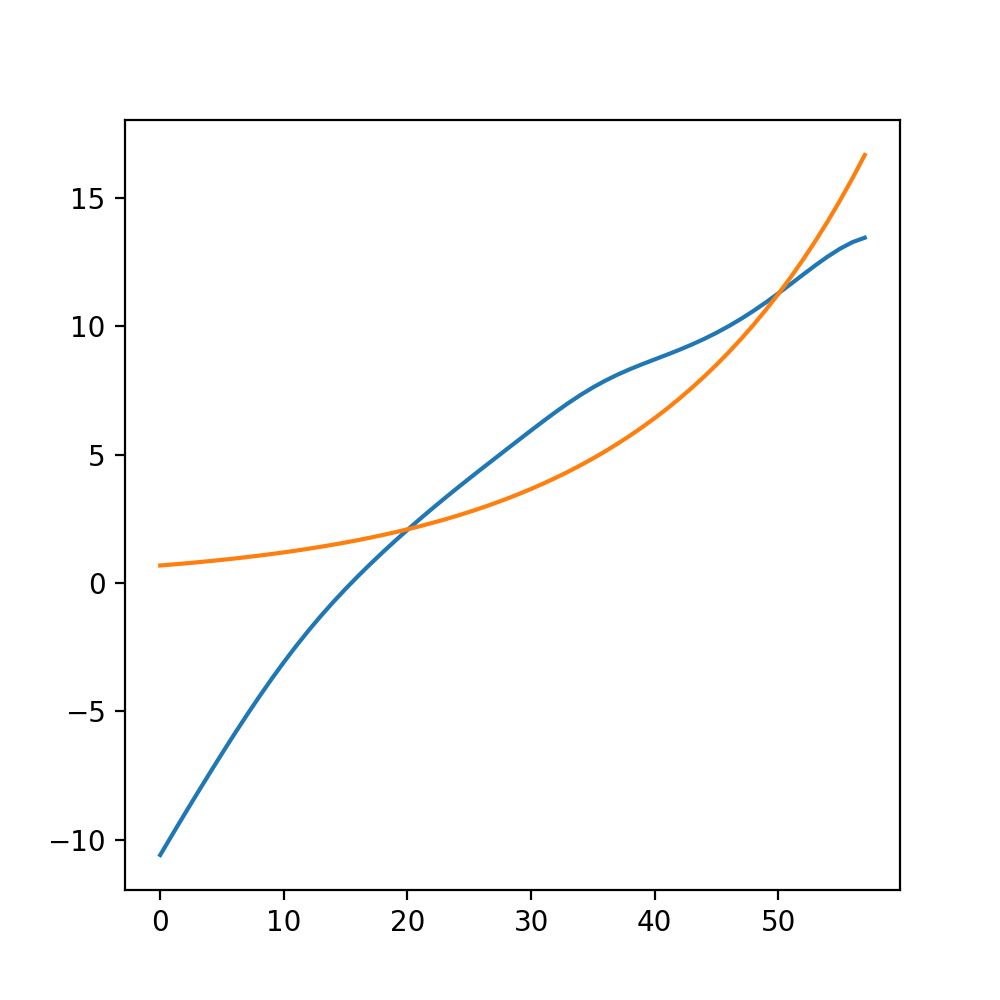

In [1589]:
fig = plt.figure(figsize=(5,5))
plt.plot(xs)
plt.plot(fun(r.x))

In [1357]:
aa = abf.sweepY[res[:,2]]-base

In [1349]:
base

array([  0.    ,  -3.7795,  -5.433 , ..., -47.4083, -35.9322, -62.4703])

<IPython.core.display.Javascript object>


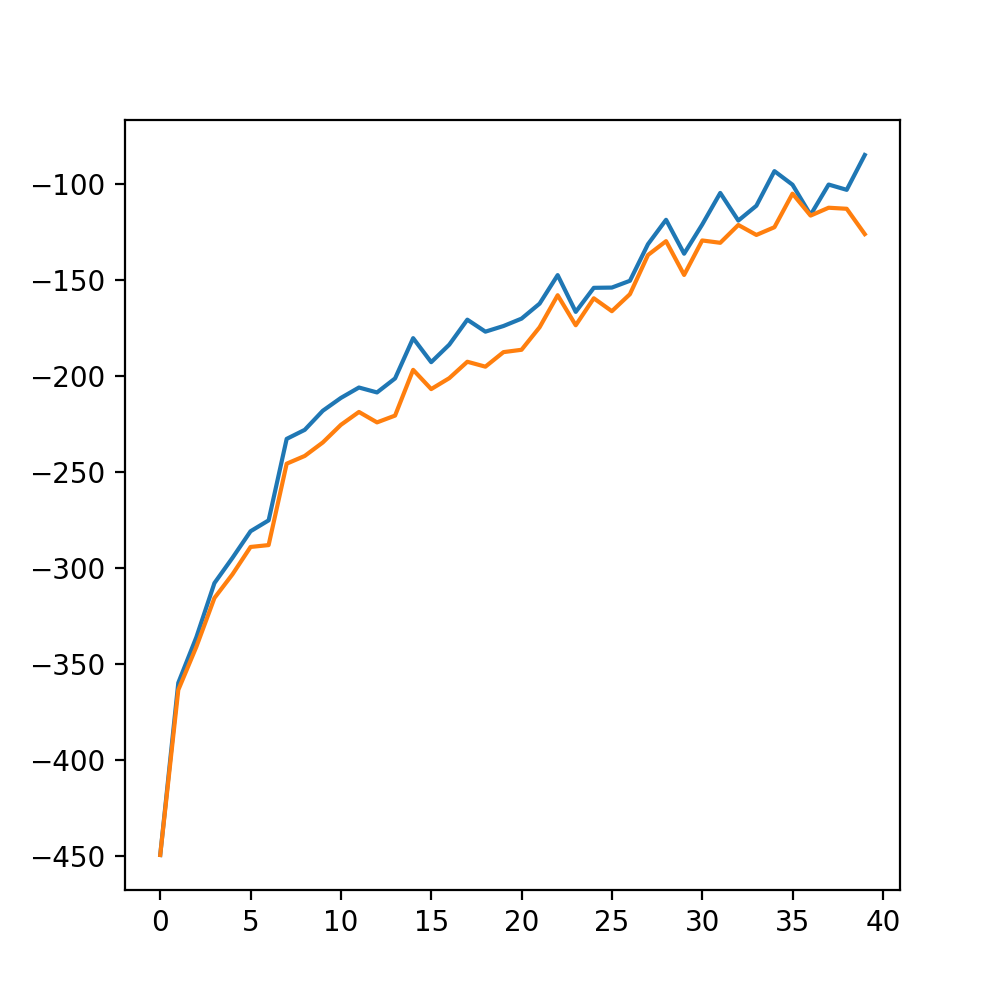

In [1358]:
fig = plt.figure(figsize=(5,5))
plt.plot(aa)
plt.plot(abf.sweepY[res[:,2]])

<IPython.core.display.Javascript object>


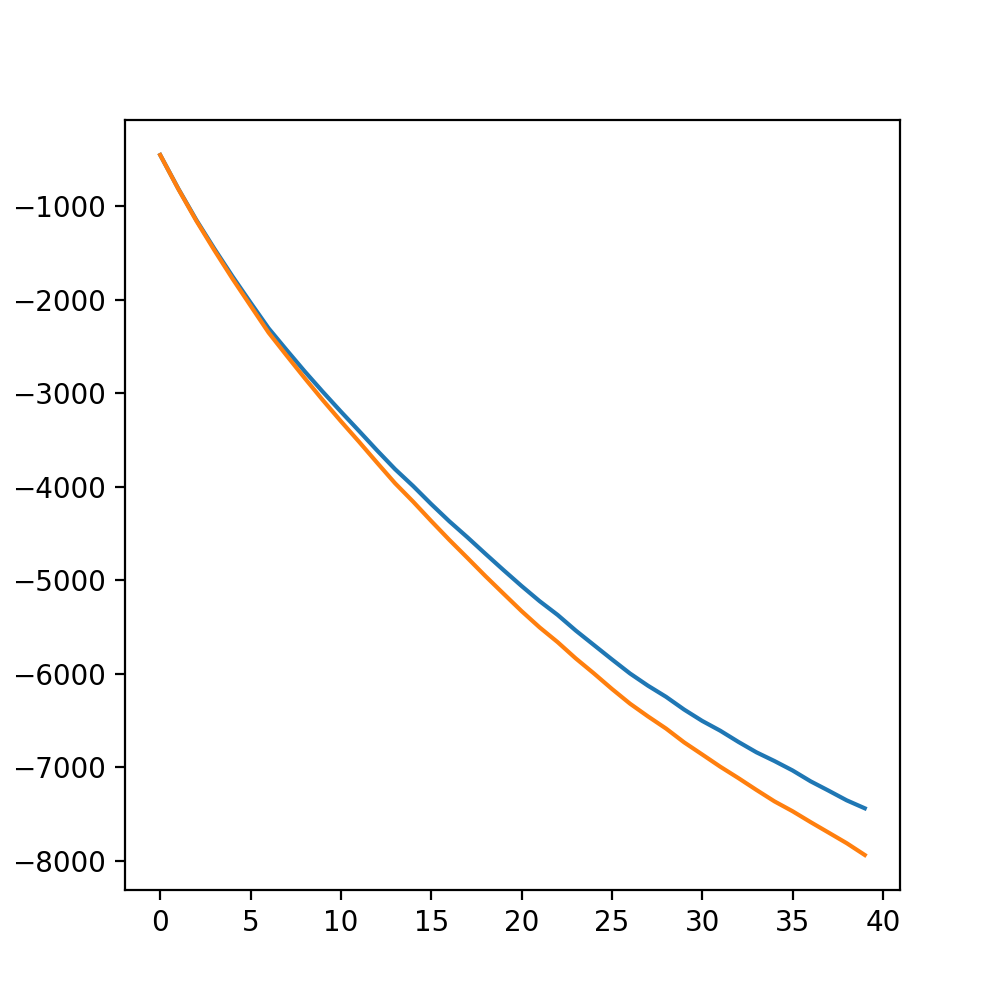

In [1359]:
fig = plt.figure(figsize=(5,5))
plt.plot(np.cumsum(aa))
plt.plot(np.cumsum(abf.sweepY[res[:,2]]))

In [1360]:
import statsmodels.api as sm

w=5
caa = np.cumsum(aa)[-w:]
# caa = np.cumsum(abf.sweepY[res[:,2]])[-w:]
xs = np.array(range(len(aa)))[-w:]+1
xs = sm.add_constant(xs, prepend=False)

mod = sm.OLS(caa, xs)

rl = mod.fit()
rl.summary()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1115.
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           5.90e-05
Time:                        17:55:37   Log-Likelihood:                -17.127
No. Observations:                   5   AIC:                             38.25
Df Residuals:                       3   BIC:                             37.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -101.3982      3.036    -33.398      0.000    -111.060     -91.736
const      -3391.8757    115.451    -29.379      0.000   -3759.291   -3024.461
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.777
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.818
Skew:                           0.391   Prob(JB):                        0.664
Kurtosis:                       1.179   Cond. No.                     1.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [384]:
rl.params[1]

-666.356458997686

In [411]:
proc_single_trace(abf, fs)

-1575.2838703999696

In [390]:
from os import walk
(_, _, filenames) = next(walk('WT_Data/Deplete/'))

In [400]:
import os
path = 'WT_Data/Deplete/'
# path = '.'
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".abf"):
             print(os.path.join(root, file))

WT_Data/Deplete/15115017.abf
WT_Data/Deplete/15121012.abf
WT_Data/Deplete/15325019.abf
WT_Data/Deplete/15325023.abf
WT_Data/Deplete/15115004.abf
WT_Data/Deplete/15121016.abf
WT_Data/Deplete/15115021.abf
WT_Data/Deplete/15121008.abf
WT_Data/Deplete/15120007.abf
WT_Data/Deplete/15120003.abf


In [401]:
import os
for file in os.listdir(path):
    if file.endswith(".abf"):
        print(os.path.join(path, file))

WT_Data/Deplete/15115017.abf
WT_Data/Deplete/15121012.abf
WT_Data/Deplete/15325019.abf
WT_Data/Deplete/15325023.abf
WT_Data/Deplete/15115004.abf
WT_Data/Deplete/15121016.abf
WT_Data/Deplete/15115021.abf
WT_Data/Deplete/15121008.abf
WT_Data/Deplete/15120007.abf
WT_Data/Deplete/15120003.abf


In [376]:
# fun = lambda w: w[0]+np.exp(-w[1]*t+w[2])
fun = lambda w: w[0]*np.exp(-w[1]*t)+w[2]
fun1 = lambda w: np.linalg.norm(xs-fun(w))

In [377]:
xs = aa[1:]
t = np.linspace(0,1,len(xs))
w0=[np.min(xs),0.3,np.max(xs)]
minimizer_kwargs = {"method": "Nelder-Mead",'tol':1e-6}
r = basinhopping(fun1, w0, minimizer_kwargs=minimizer_kwargs, niter=20)

In [378]:
r.x

array([-106.922 ,    1.7825,  -71.6621])

<IPython.core.display.Javascript object>


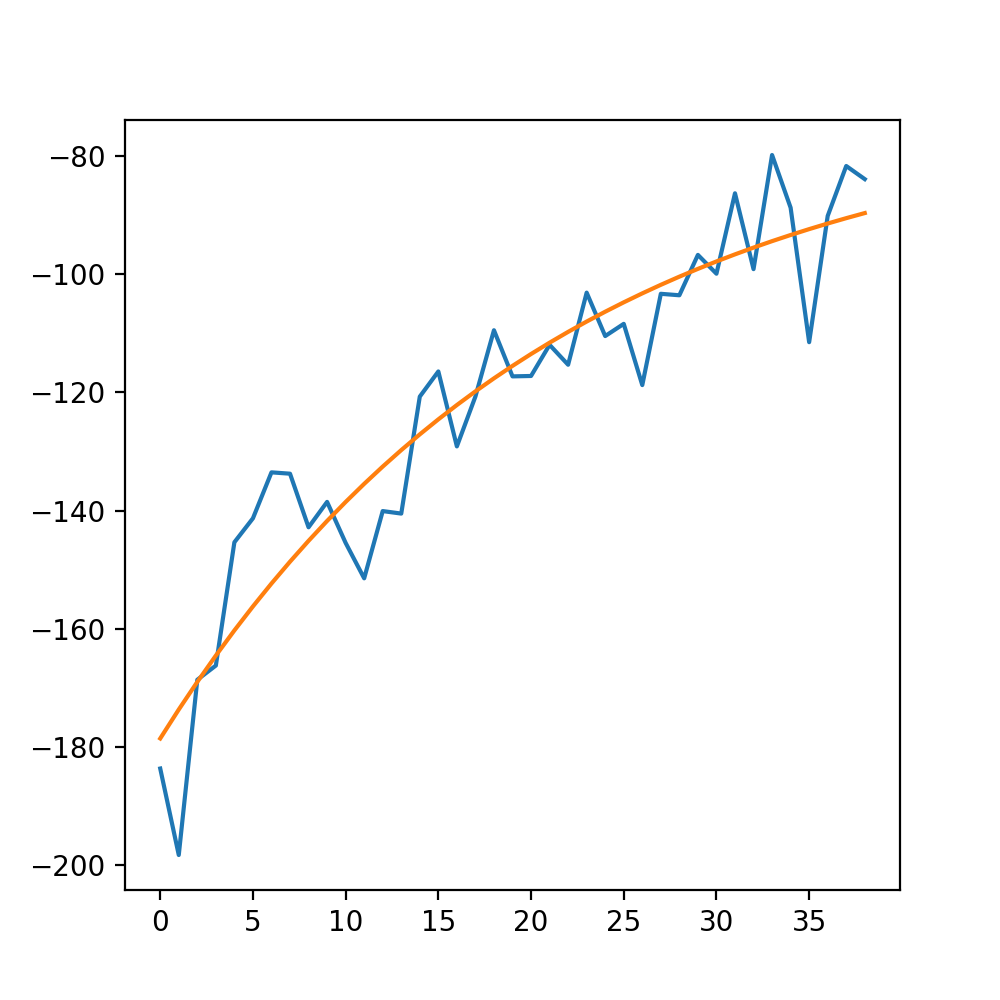

In [379]:
fig = plt.figure(figsize=(5,5))
plt.plot(xs)
plt.plot(fun(r.x))

<IPython.core.display.Javascript object>


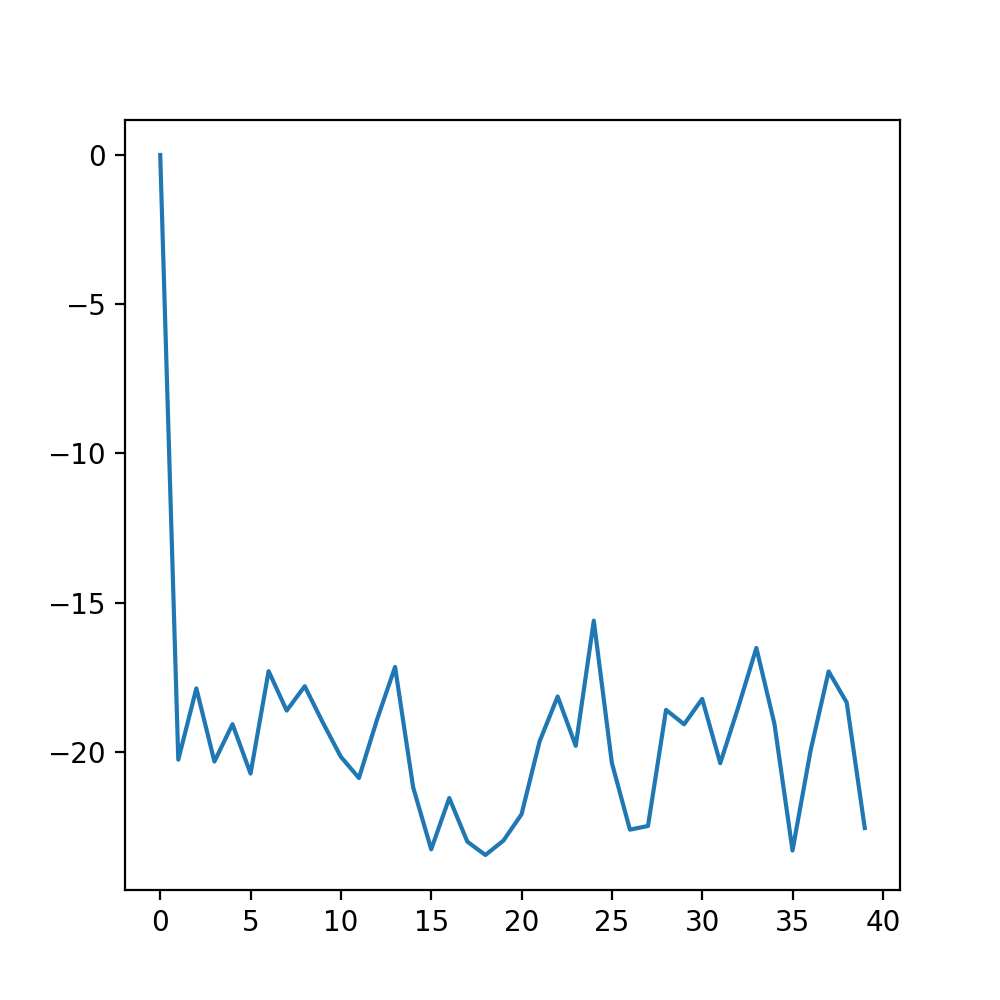

In [355]:
fig = plt.figure(figsize=(5,5))
plt.plot(base)

In [1099]:
# y=abf.sweepY
i=10
xs = y_notched[res[i,0]:res[i,1]]
y=y_notched
Y = np.fft.fft(y)
TP = np.fft.fft(xs,n=len(y))
X = Y/TP
xt = np.fft.ifft(X)

<IPython.core.display.Javascript object>


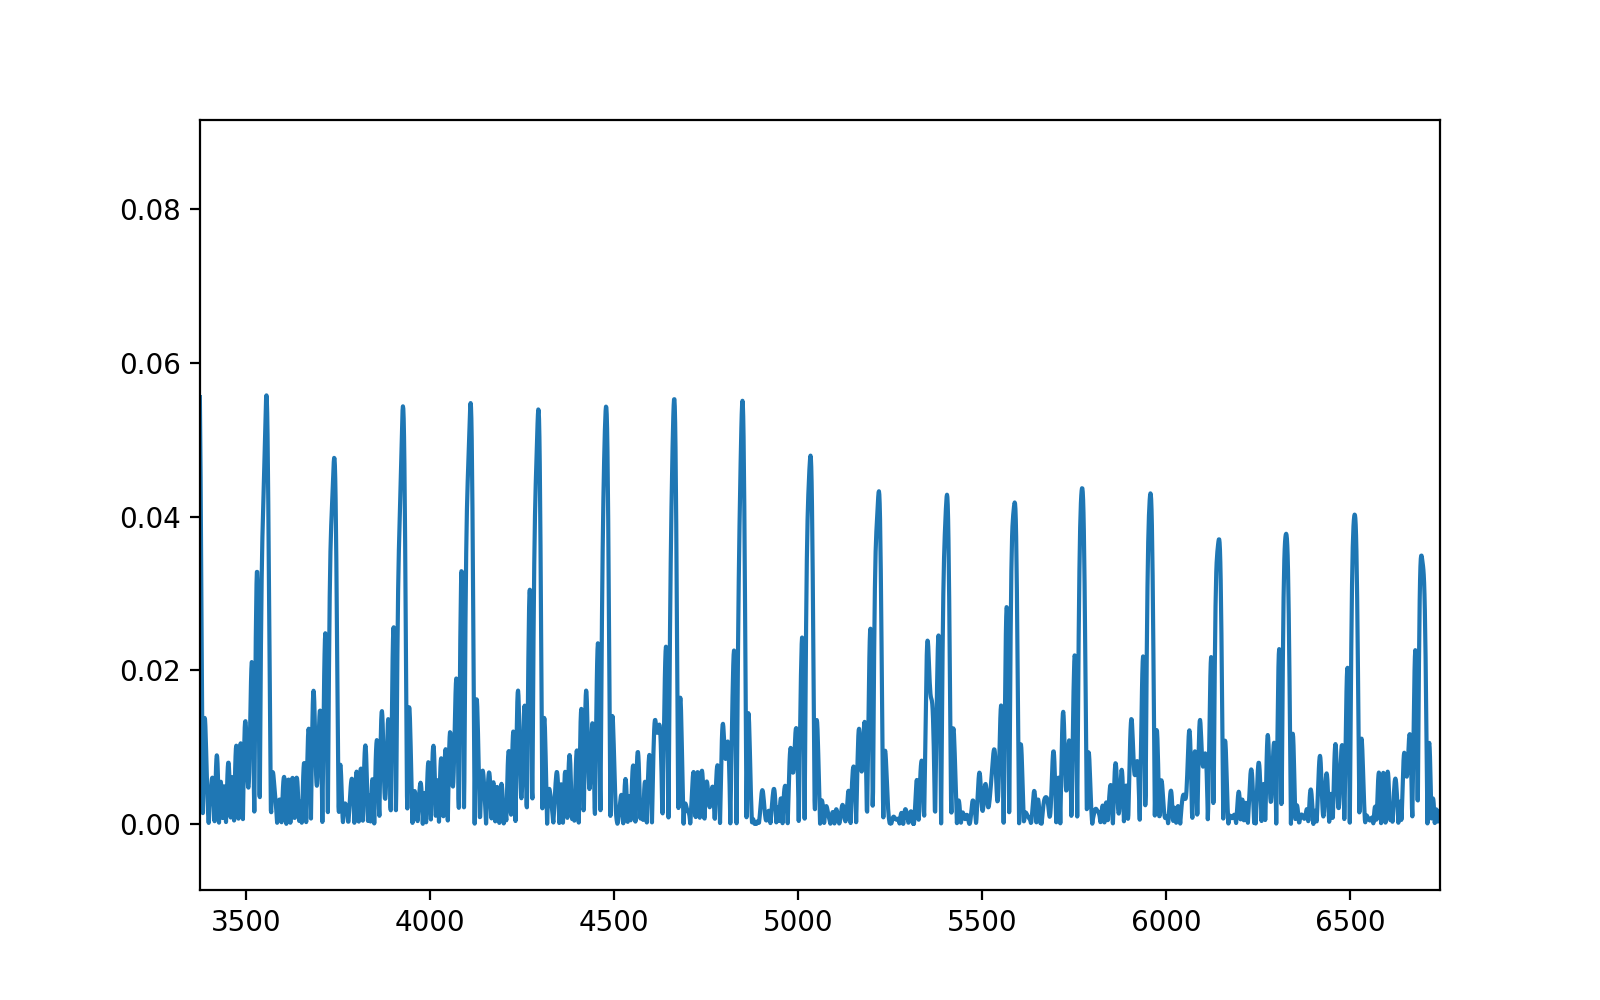

In [1100]:
plt.figure(figsize=(8, 5))
plt.plot(np.abs(xt))

In [56]:
f, Pxx_den = signal.welch(abf.sweepY, fs, nperseg=1024*8, average='median')

<IPython.core.display.Javascript object>


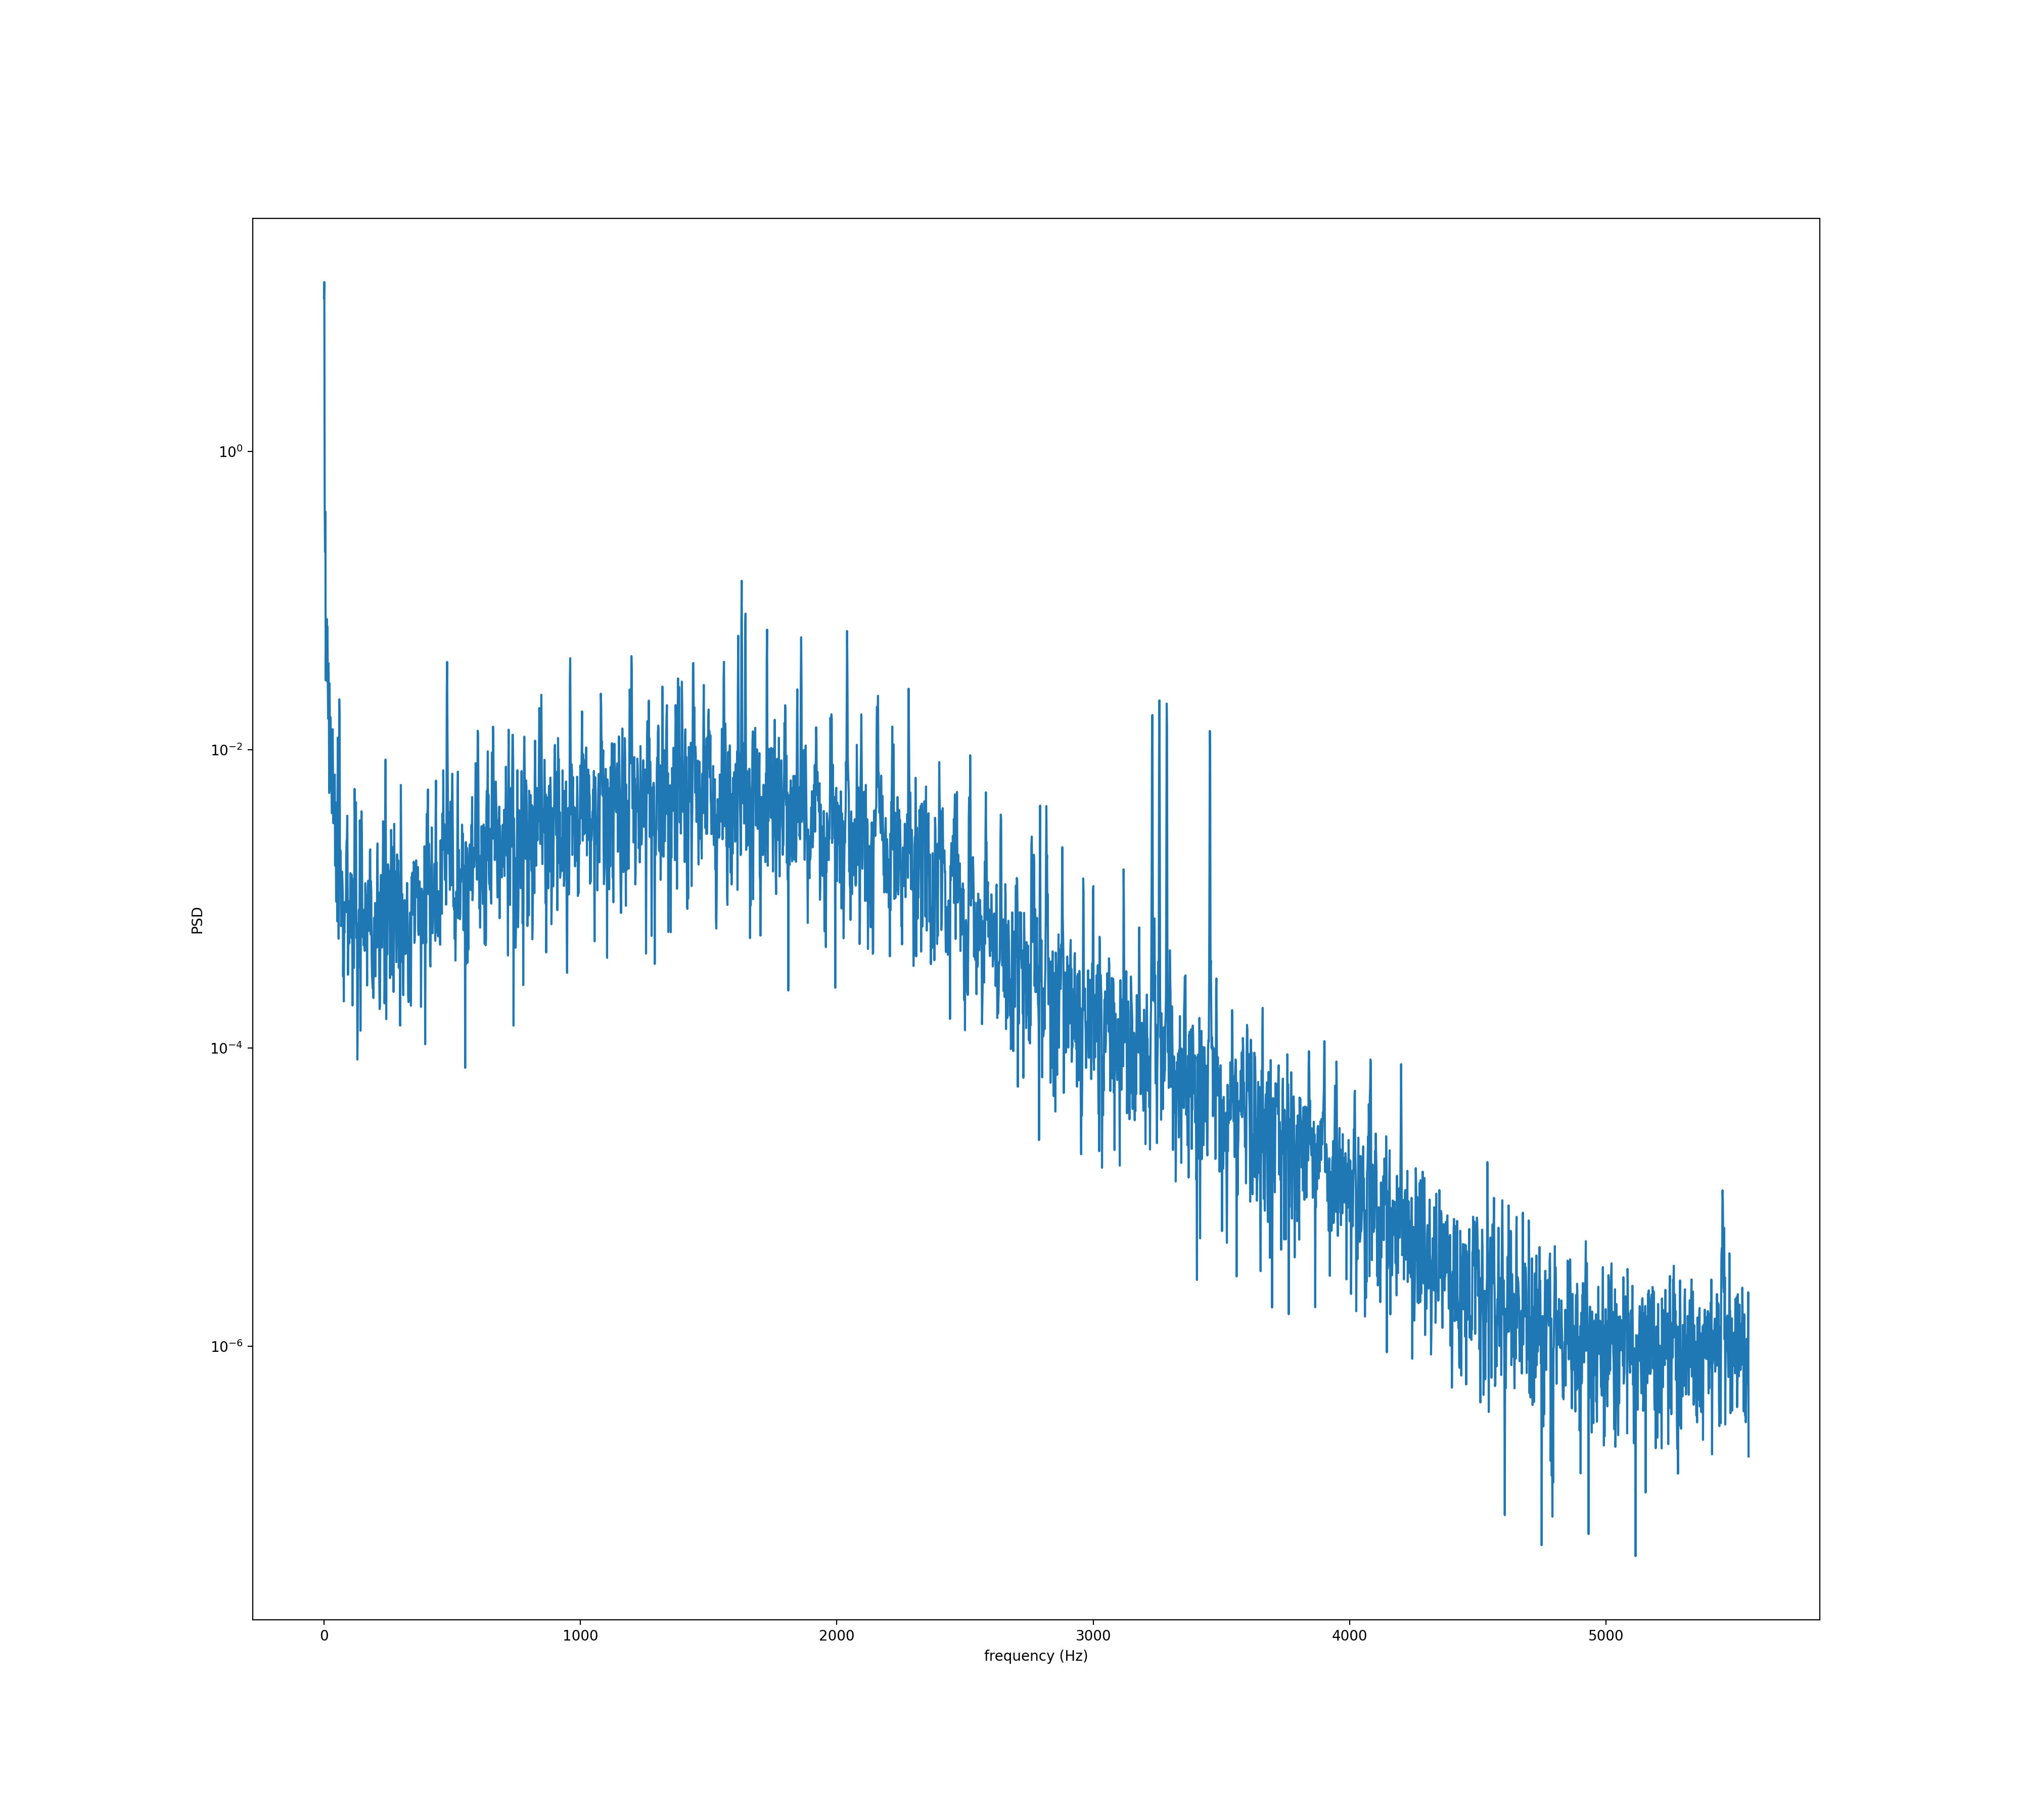

In [58]:
fig = plt.figure(figsize=(10,9))
plt.semilogy(f, Pxx_den)
# plt.plot(f, Pxx_den)
# m=500
# plt.semilogy(f[:m], Pxx_den[:m])

# plt.ylim([0.5e-3, 1])
plt.xlabel('frequency (Hz)')
plt.ylabel('PSD')
plt.show()

<IPython.core.display.Javascript object>


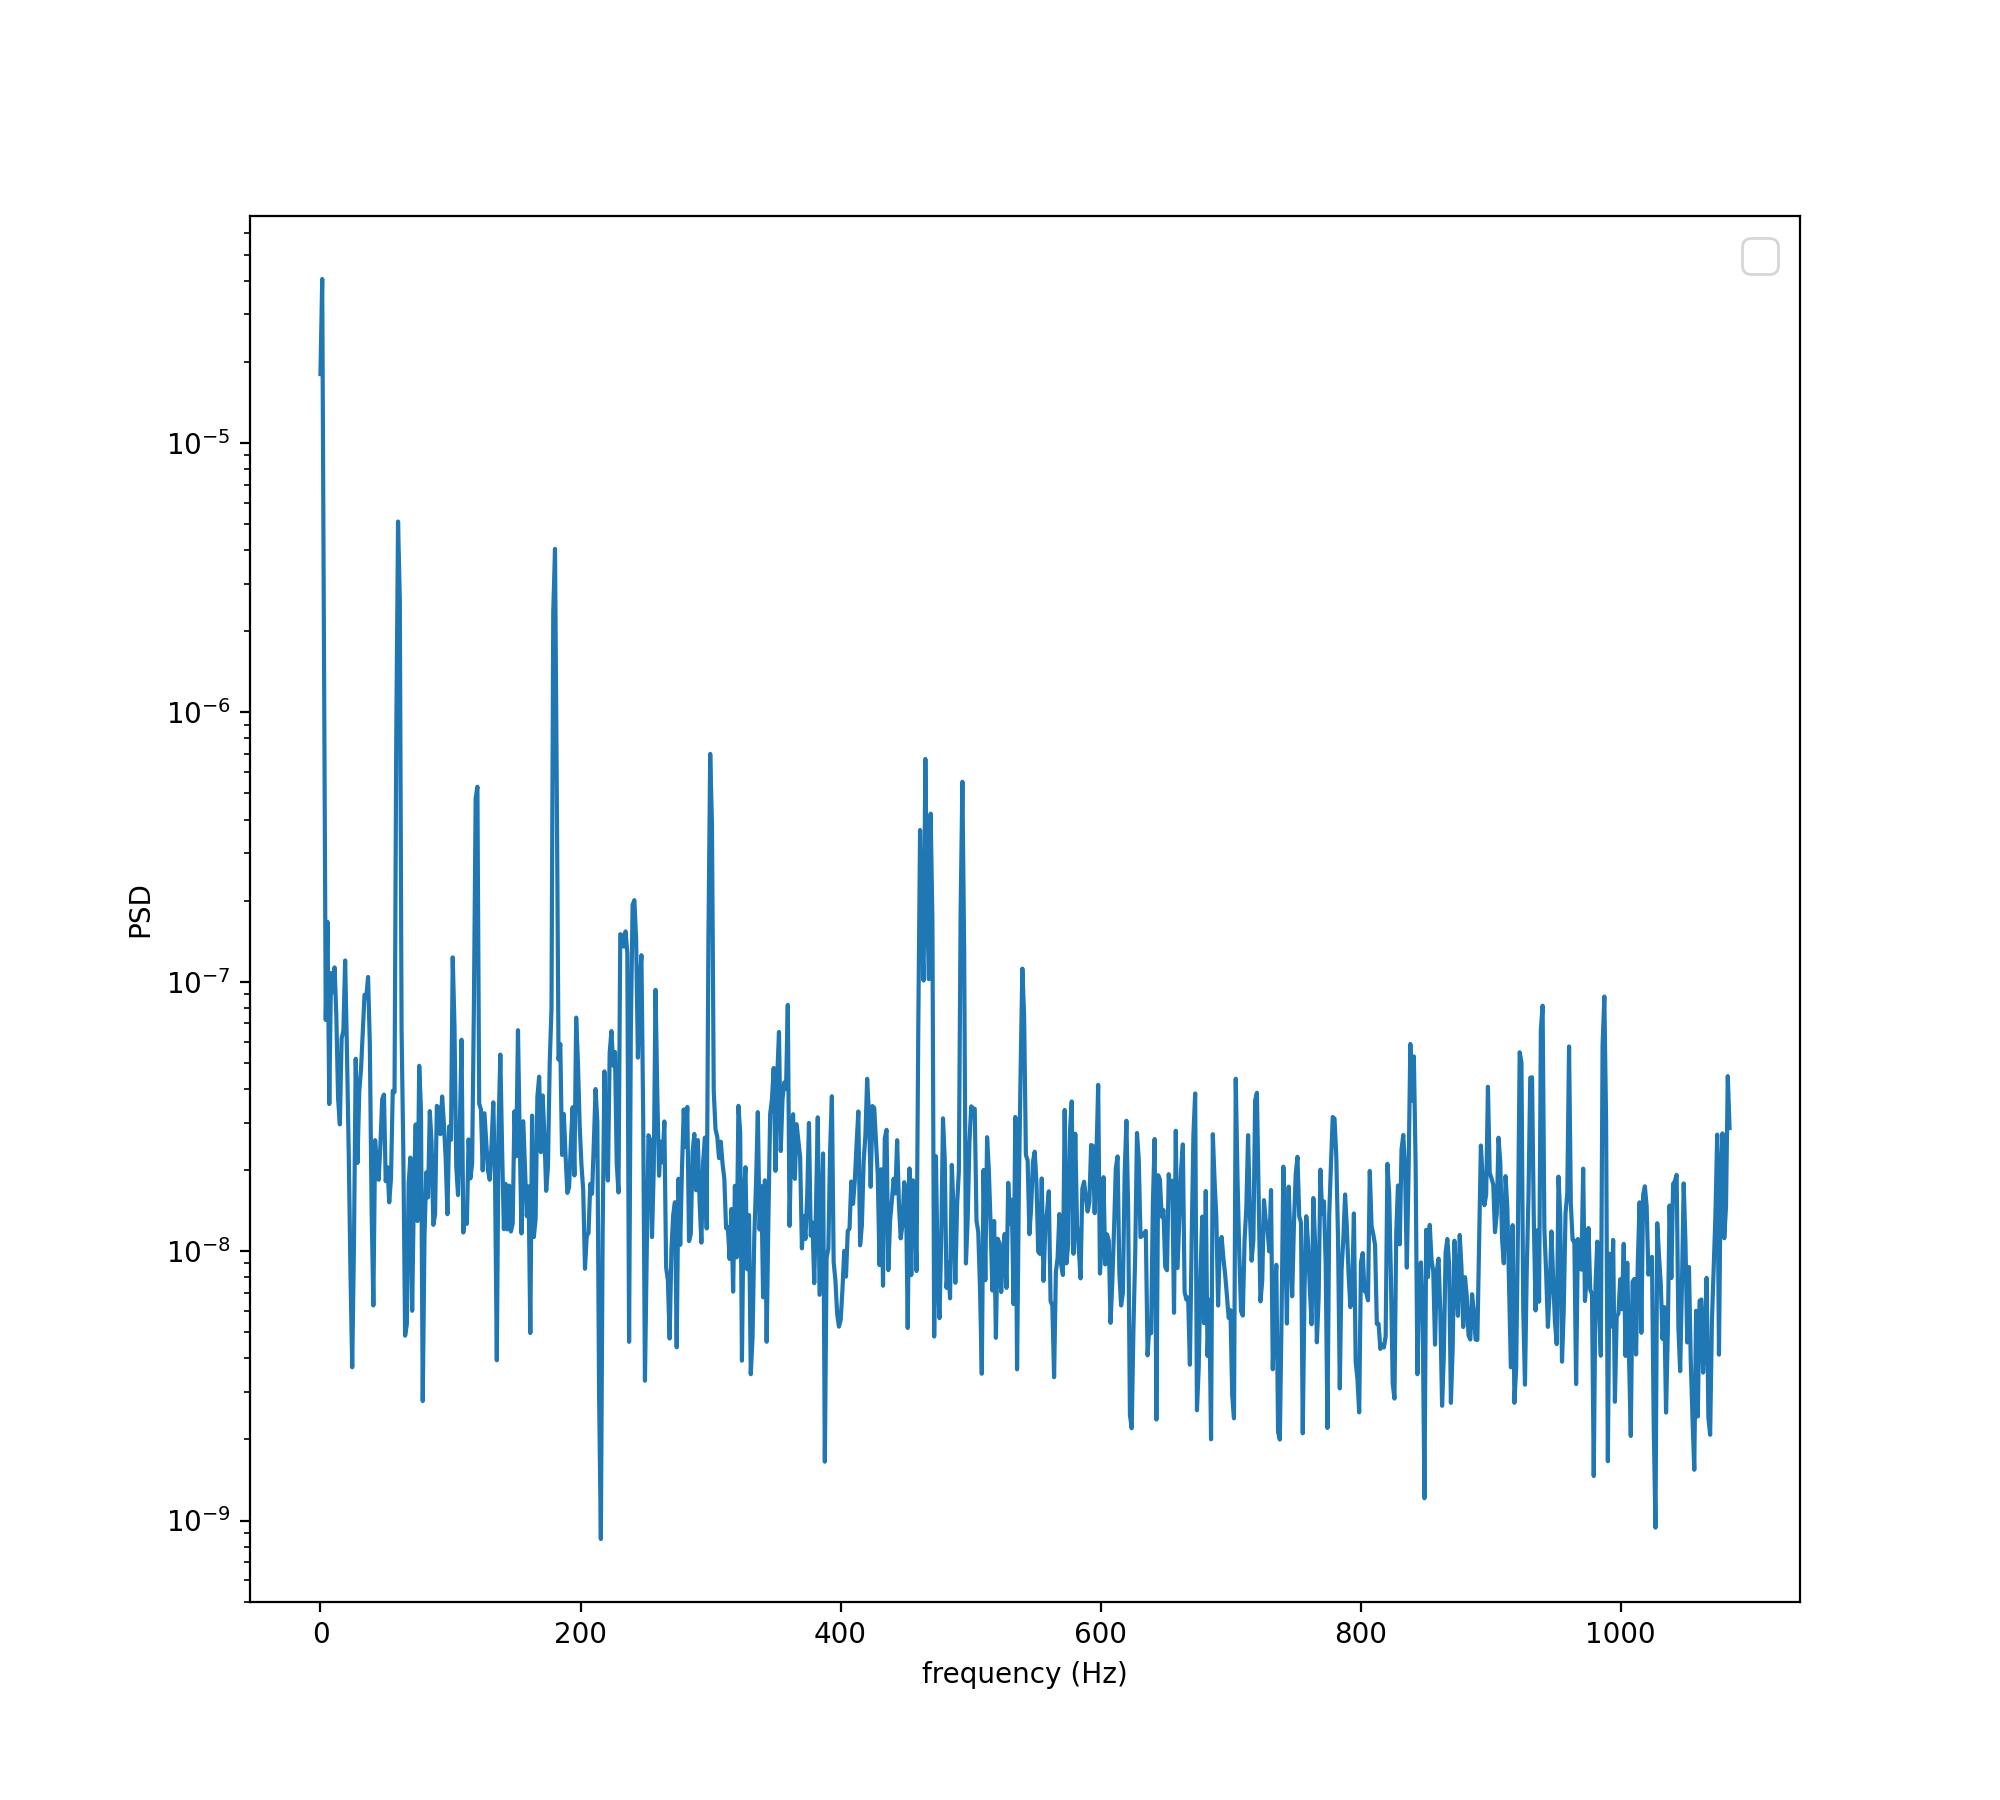

Text(0, 0.5, 'PSD')

In [33]:
fig = plt.figure(figsize=(10,9))
m=800
plt.semilogy(f[:m], Pxx_den[:m])#,marker='.')
plt.legend(fontsize=16)
# plt.plot(f, Pxx_den)
# m=500
# plt.semilogy(f[:m], Pxx_den[:m])

# plt.ylim([0.5e-3, 1])
plt.xlabel('frequency (Hz)')
plt.ylabel('PSD')
# fig.savefig('fig_mouse_PSD_500.pdf', format='pdf')

In [414]:
def proc_single_trace(abf, fs, lowpass_f=500, th=-100, w=5):
    b,a = signal.butter(3, lowpass_f, btype='lowpass', fs=fs, output='ba') 
    y_notched = signal.filtfilt(b, a, abf.sweepY)

    order = 30
    idxs = argrelextrema(y_notched, np.less,order=order)[0]
    pks = y_notched[idxs]

    ids1 = idxs[pks<th]

    dd = np.diff(ids1)
    m = np.median(dd)
    v = np.median(np.abs(dd-m))*1.4826
    up = m+8*v
    dn = m-8*v

    ii = np.where((dd>dn)&(dd<up))[0]
    sel = list(set(ii)|set(ii+1))

    ids1 = ids1[sel]

    order = 3
    idxm = argrelextrema(abf.sweepY, np.greater,order=order)[0]
    idxmf = argrelextrema(y_notched, np.greater,order=10)[0]

    res=[]
    for i in range(len(ids1)):
        j=ids1[i]
        s=idxm[np.where((idxm<j)&((j-idxm)>10))[0][-1]]
        t=idxmf[np.where(idxmf>j)[0][0]]
        res.append([s,t,j])
    res=np.array(res)


    minimizer_kwargs = {"method": "Nelder-Mead",'tol':1e-6}
    base = np.zeros(len(res))

    fun = lambda w: w[0]*np.exp(-w[1]*t)
    fun1 = lambda w: np.linalg.norm(xs-fun(w))

    for i in range(len(res)-1):
        if i<=1:
            a=0.6
        else:
            a=0.5
        tt = abf.sweepY[res[i,2]:res[i,1]]
        xs=tt[int(len(tt)*a):]
        s = int(len(tt)*a) + res[i,2]
        t = np.linspace(0,1,len(xs))
        dt = t[1]-t[0]

        w0=[np.min(xs)*0.8,1]

        r = basinhopping(fun1, w0, minimizer_kwargs=minimizer_kwargs, niter=2)

        t = (res[i+1:,2]-s)*dt
        base[i+1:]=base[i+1:]+fun(r.x)

    aa = abf.sweepY[res[:,2]]-base

    caa = np.cumsum(aa)[-w:]
    # caa = np.cumsum(abf.sweepY[res[:,2]])[-w:]
    xs = np.array(range(len(aa)))[-w:]
    xs = sm.add_constant(xs, prepend=False)

    mod = sm.OLS(caa, xs)

    rl = mod.fit()

    return rl.params[1]

In [415]:
def proc_trace(abf,channel=1):
    T = abf.sweepX[1]-abf.sweepX[0]
    fs = 1/T

    nc = abf.sweepCount
    res = []
    for i in range(nc):
        abf.setSweep(i,channel)
        r=proc_single_trace(abf,fs)
        res.append(r)
    return res

In [1125]:
rs=proc_trace(abf)

In [1126]:
rs

[-2893.533826498311,
 -2744.978242344245,
 -2906.246802282829,
 -2854.387490496487,
 -3707.948279781678,
 -2804.2396460757336]

In [1124]:
def proc_single_trace(abf, fs, lowpass_f=400, th=-80, w=5):
    b,a = signal.butter(3, lowpass_f, btype='lowpass', fs=fs, output='ba') 
    y_notched = signal.filtfilt(b, a, abf.sweepY)

    order = 25
    idxs = argrelextrema(y_notched, np.less,order=order)[0]
    pks = y_notched[idxs]

    up = pks[pks<th][0]*1.01
    ids1 = idxs[(pks<th)&(pks>up)]

    dd = np.diff(ids1)
    m = np.median(dd)
    v = 0.5#max(np.median(np.abs(dd-m))*1.4826,0.5)
    up = m+15*v
    dn = m-15*v

    # ii = np.where((dd>dn)&(dd<up))[0]
    # sel = list(set(ii)|set(ii+1))
    # sometimes the gap can be large.
    # sel=np.array(range(sel[-1]+1))

    sel=[0]
    p=0
    for i in range(1,len(ids1)):
        d = ids1[i]-ids1[p]
        if d>dn and d<up:
            sel.append(i)
            p=i

    # sel =[]
    # for j in range(len(ii)-1):
    #     if ii[j+1]-ii[j]>1:
    #         break
    #     sel.append(ii[j+1])
    #     sel.append(ii[j])
    # sel = np.array(sel)
    # sel = list(set(sel)|set(sel+1))

    ids1 = ids1[sel]

    order = 3
    idxm = argrelextrema(abf.sweepY, np.greater,order=order)[0]
    idxmf = argrelextrema(y_notched, np.greater,order=10)[0]

    res=[]
    for i in range(len(ids1)):
        j=ids1[i]
        s=idxm[np.where((idxm<j)&((j-idxm)>10))[0][-1]]
        t=idxmf[np.where(idxmf>j)[0][0]]
        res.append([s,t,j])
    res=np.array(res)


    minimizer_kwargs = {"method": "Nelder-Mead",'tol':1e-6}
    base = np.zeros(len(res))

    fun = lambda w: w[0]*np.exp(-w[1]*t)
    fun1 = lambda w: np.linalg.norm(xs-fun(w))

    for i in range(len(res)-1):
        if i<=1:
            a=0.6
        else:
            a=0.5
        tt = abf.sweepY[res[i,2]:res[i,1]]
        xs=tt[int(len(tt)*a):]
        s = int(len(tt)*a) + res[i,2]
        t = np.linspace(0,1,len(xs))
        dt = t[1]-t[0]

        w0=[np.min(xs)*0.8,1]

        r = basinhopping(fun1, w0, minimizer_kwargs=minimizer_kwargs, niter=2)
        if r.x[1]<0:
            raise NameError('negative exponent')

        t = (res[i+1:,2]-s)*dt
        base[i+1:]=base[i+1:]+fun(r.x)

    aa = abf.sweepY[res[:,2]]-base

    caa = np.cumsum(aa)[-w:]
    # caa = np.cumsum(abf.sweepY[res[:,2]])[-w:]
    xs = np.array(range(len(aa)))[-w:]
    xs = sm.add_constant(xs, prepend=False)

    mod = sm.OLS(caa, xs)

    rl = mod.fit()

    return rl.params[1]

In [43]:
n=1432
c=1434
for i in range(n-1,0,-1):
    c=2+(i)/(i+2)*c

In [47]:
c*1433

5730.0

In [48]:
5730/1433

3.9986043265875786

In [49]:
5730+1433

7163